In [2]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression , Ridge ,Lasso , LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("train.csv")
new_df = df.copy()
total = len(df.Name)
for col in df.columns:
    percent_na = (float(df[col].isna().sum())/total)*100
    if percent_na>70.0:
        new_df = new_df.drop(col , axis = 1)

new_df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
print new_df.shape
print ("\n")
print new_df.info()

(891, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [26]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop('Cabin',axis = 1)
print test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB
None


In [27]:
print new_df.Embarked.value_counts()
print test_df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [9]:
print new_df.Age.mean()
new_df.Age.std()

29.69911764705882


14.526497332334042

In [10]:
new_df.Embarked = new_df.Embarked.fillna('S')
test_df.Embarked = test_df.Embarked.fillna('S')

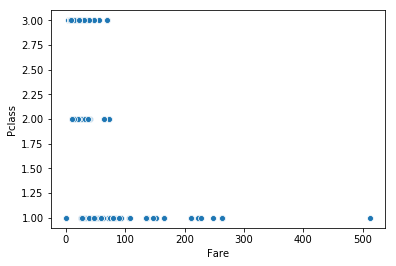

In [11]:
ax = sns.scatterplot(y = 'Pclass' , x = 'Fare' , data = test_df)
test_df[test_df['Fare'].isnull()]
sum_pclass = 0
x = test_df.loc[test_df['Pclass'] == 3 , 'Fare'].mean()
test_df["Fare"].fillna(x , inplace = True)

In [12]:
# now for age we need to have better way of looking things , since the data is much mixed up and diverse , using 
# graphical interpretation would be of help

In [13]:
new_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

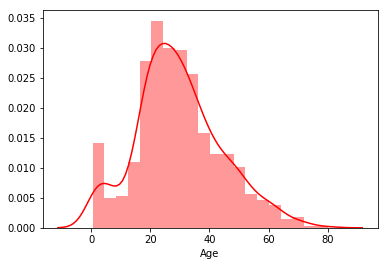

In [14]:
x = new_df.Age
x = x.dropna()
ax =  sns.distplot(x , kde = True , color = 'red')

In [15]:
#  why mean to be avoided here?
#  because std dev is very high as nearly half of mean , using mean will naive 

In [16]:
new_df.Age = new_df.Age.interpolate(method = 'linear')
test_df.Age = test_df.Age.interpolate(method = 'linear')

In [17]:
new_df.Age.describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
test_df.Age.describe()

count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64

In [19]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


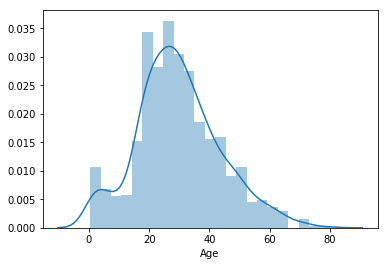

In [20]:
ax = sns.distplot(new_df.Age)


In [21]:
new_df.head()
#  passengerid , name and ticket seems to be of no use and so its better to drop these 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
new_df = new_df.drop(['PassengerId' , "Name" , 'Ticket'] , axis = 1)
test_df = test_df.drop(['PassengerId' , "Name" , 'Ticket'] , axis = 1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


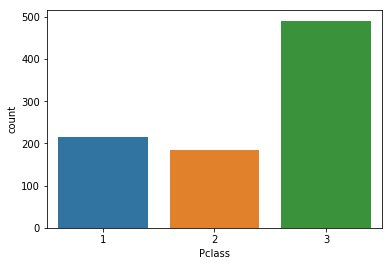

In [23]:
# sns.set(style = 'darkgrid')
sns.countplot( x = 'Pclass',data = new_df)

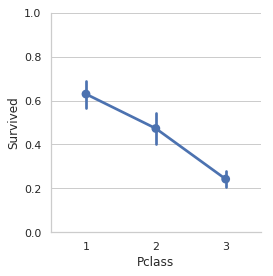

In [24]:
sns.set(style = "whitegrid")
g = sns.PairGrid(data = new_df , x_vars = 'Pclass' ,y_vars = 'Survived' , height = 4)
g.map(sns.pointplot)
g.set(ylim = (0,1))

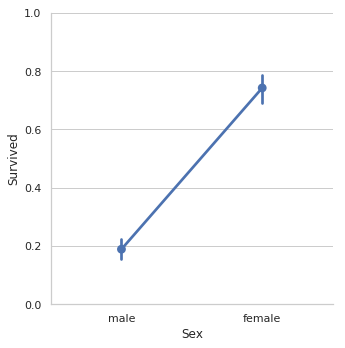

In [176]:
g = sns.PairGrid(new_df ,  x_vars = 'Sex' , y_vars = 'Survived' ,height = 5)
g.map(sns.pointplot)
g.set(ylim = (0,1))

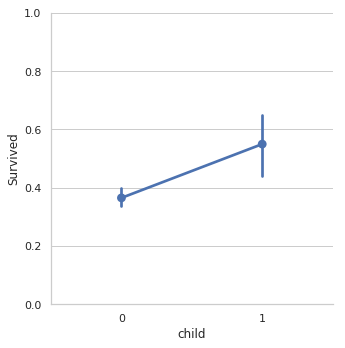

In [177]:
new_df['child'] = new_df['Age'].apply(lambda x:1 if x<15 else 0)
new_df['child'].value_counts()
test_df['child'] = test_df['Age'].apply(lambda x:1 if x<15 else 0)
test_df['child'].value_counts()
g = sns.PairGrid(new_df , y_vars = 'Survived' , x_vars = 'child' , height = 5)
g.map(sns.pointplot)
g.set(ylim=(0,1))

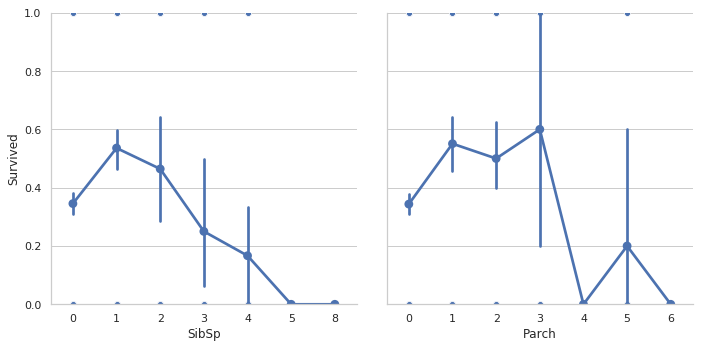

In [178]:
g = sns.pairplot(new_df , y_vars = 'Survived' , x_vars = ['SibSp' , 'Parch'], height = 5)
g.map(sns.pointplot)
g.set(ylim = (0,1))



In [179]:
new_df['Family'] = new_df['SibSp']+new_df['Parch']
test_df['Family'] = test_df['SibSp']+test_df['Parch']
test_df = test_df.drop(['SibSp' , 'Parch'] , axis = 1)
new_df = new_df.drop(['SibSp' , 'Parch'] , axis = 1)
new_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,child,Family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0


In [180]:
new_df['is_female'] = new_df['Sex'].apply(lambda x : 0 if x == 'male' else 1)
new_df = new_df.drop('Sex' , axis = 1)

test_df['is_female'] = test_df['Sex'].apply(lambda x : 0 if x == 'male' else 1)
test_df = test_df.drop('Sex' , axis = 1)

new_df['is_alone'] = new_df['Family'].apply(lambda x : 1 if x == 0 else 0 )
test_df['is_alone'] = test_df['Family'].apply(lambda x : 1 if x == 0 else 0 )



In [181]:

new_df = pd.get_dummies(new_df , prefix = ['is'])
test_df = pd.get_dummies(test_df , prefix = ['is'])

new_df.head()

,Survived,Pclass,Age,Fare,child,Family,is_female,is_alone,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,1,0,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,1,0,0,0,1
4,0,3,35.0,8.0500,0,0,0,1,0,0,1


In [31]:
y = new_df['Survived']
X = new_df.drop('Survived' ,axis = 1)

In [182]:
test_df.head()

,Pclass,Age,Fare,child,Family,is_female,is_alone,is_C,is_Q,is_S
0,3,34.5,7.8292,0,0,0,1,0,1,0
1,3,47.0,7.0000,0,1,1,0,0,0,1
2,2,62.0,9.6875,0,0,0,1,0,1,0
3,3,27.0,8.6625,0,0,0,1,0,0,1
4,3,22.0,12.2875,0,2,1,0,0,0,1


In [43]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = .75 , test_size = .25)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:

def tuning(parameters , model):
    classifier = model()
    clf = GridSearchCV(classifier , parameters , return_train_score = True)
    clf.fit(X_train , y_train)
    df_result =  pd.DataFrame(clf.cv_results_)
    return (df_result)
    

In [183]:
GradBoost = GradientBoostingClassifier()
GradBoost.fit(X_train , y_train)
GradBoost.score(X_test , y_test)

0.8251121076233184

In [184]:
SVM_clf = SVC(kernel='rbf'  ,gamma = 'auto', C = 1)
SVM_clf.fit(X_train , y_train)
print SVM_clf.score(X_test , y_test)
print (S)

0.6547085201793722


NameError: name 'S' is not defined

In [185]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log_reg = tuning(param_grid , LogisticRegression)
log_reg

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.010269,0.002991,0.675150,0.681884,0.001,{u'C': 0.001},7,0.687500,0.680180,0.680180,0.681614,0.657658,0.683857,0.003905,0.001339,0.012698,0.001513
1,0.005673,0.001508,0.705090,0.714065,0.01,{u'C': 0.01},6,0.709821,0.709459,0.693694,0.724215,0.711712,0.708520,0.001438,0.000416,0.008077,0.007188
2,0.004208,0.001155,0.800898,0.812134,0.1,{u'C': 0.1},2,0.799107,0.817568,0.779279,0.820628,0.824324,0.798206,0.000345,0.000094,0.018406,0.009927
3,0.004287,0.001178,0.802395,0.811380,1,{u'C': 1},1,0.794643,0.813063,0.783784,0.825112,0.828829,0.795964,0.000157,0.000038,0.019170,0.011959
4,0.004289,0.001133,0.799401,0.813619,10,{u'C': 10},5,0.794643,0.810811,0.774775,0.831839,0.828829,0.798206,0.000022,0.000053,0.022292,0.013873
5,0.004574,0.001127,0.800898,0.815113,100,{u'C': 100},2,0.794643,0.810811,0.774775,0.831839,0.833333,0.802691,0.000135,0.000017,0.024281,0.012282
6,0.004432,0.001180,0.800898,0.815861,1000,{u'C': 1000},2,0.794643,0.810811,0.774775,0.831839,0.833333,0.804933,0.000211,0.000111,0.024281,0.011550


In [186]:
# thus using c = 10 gets the best score in test
log_reg = LogisticRegression(C=11)
log_reg.fit(X_train , y_train)
print log_reg.score(X_test , y_test)

0.7847533632286996


In [187]:
knn = KNeighborsClassifier(n_neighbors = 8 , algorithm = 'ball_tree' )
knn.fit(X_train , y_train)
print knn.score(X_test , y_test)

0.672645739910314


In [188]:
ridge_reg = Ridge()
ridge_reg.fit(X_train , y_train)
print ridge_reg.score(X_test , y_test)

0.3970641207824403


In [189]:
linear_reg = LinearRegression (normalize = True )
linear_reg.fit(X_train , y_train)
print linear_reg.score(X_test , y_test)

0.39698209624420155


In [190]:
lasso_reg = Lasso(alpha = .0000001, normalize = True )
lasso_reg.fit(X_train , y_train)
print lasso_reg.score(X_test , y_test) 

0.39698136387522026


In [28]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
